h =  0.01


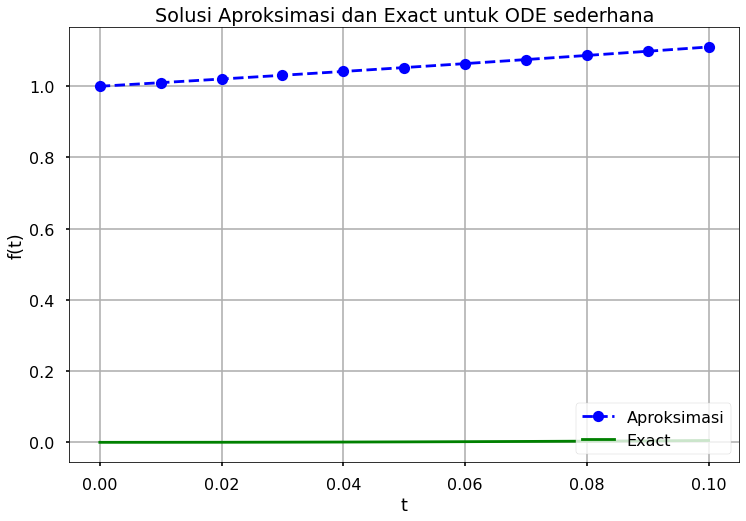

1.1103418361330284
0.005170918075647624
galat relatif absolut =  21372.818170571485 %
t =  [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
n =  10
s =  [1.         1.01010033 1.02040268 1.03090907 1.04162155 1.05254219
 1.06367309 1.07501636 1.08657414 1.09834857 1.11034184]
solusi exact =  [0.00000000e+00 5.01670842e-05 2.01340027e-04 4.54533954e-04
 8.10774192e-04 1.27109638e-03 1.83654655e-03 2.50818125e-03
 3.28706767e-03 4.17428371e-03 5.17091808e-03]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

# Definisi parameter
f = lambda t, s: t + s # ODE

# Metode Runge Kutta orde 4 
def rungekutta4(f,x0,y0,xn,n):
  h = (xn-x0)/n # ukuran langkah 
  print('h = ', h)
  t = np.arange(x0, xn + h, h) # grid Numerik
  s0 = y0 # kondisi awal
  
  # Metode Runge Kutta orde 4 
  s = np.zeros(len(t))
  s[0] = s0
  for i in range(0, len(t) - 1):
    # k1, k2, k3, k4 mencari gradien (get 6 gradien)
    k1 = h*f(t[i], s[i])
    k2 = h*f(t[i] + 0.5*h, s[i]+ 0.5*k1)
    k3 = h*f(t[i] + 0.5*h, s[i]+ 0.5*k2)
    k4 = h*f(t[i] + h, s[i]+k3)
    s[i+1] = s[i] + (1/6)*(k1 + 2*k2 + 2*k3+ k4) # y sblmnya + avg gradien = y setelahnya
    t[i+1] = t[i] + h
  return t, s

x0 = 0
y0 = 1 # tebakan awal sangat mempengaruhi hasil  
xn = 0.1
n  = 10 # n = (xn-x0)/h
 
t,s = rungekutta4(f,x0,y0,xn,n)
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Aproksimasi')
plt.plot(t, np.exp(t) - t - 1, 'g', label='Exact')
plt.title('Solusi Aproksimasi dan Exact untuk ODE sederhana')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

sol_rk = s[n]
sol_exact = np.exp(0.1) - 0.1 - 1
galat_ra = abs((sol_exact-sol_rk)/sol_exact)*100

print(sol_rk)
print(sol_exact)
print('galat relatif absolut = ',galat_ra,'%')
print('t = ',t)
print('n = ',n)
print('s = ',s)
print('solusi exact = ', np.exp(t) - t - 1)